# Implementación del algoritmo de Ford Fulkerson para el problema de Flujo Máximo en Redes 
## Reporte Final, Junio 2022
### **Instituto Tecnológico Autónomo de México**

Autores:

+ Bazo Edgar
+ Hernández Luz
+ Rangel Uriel
+ Santiago Ita

---

# 1. Introducción
**nota Luz** Modificar la intro

El presente reporte contiene el resumen del proyecto realizado durante el semestre de la materia de Optimización II (primavera 2022) que consistió en realizar la implementación de un algritmo que resuelve un problema de optimización numérica. Esto ha sido de gran utilidad y aprendizaje para nosotros debido a que los problemas de optimización númerica se presentan en una gran cantidad de aplicaciones que podemos encontrar en las áreas de Estadística, Ingeniería, Finanzas, Aprendizaje de Máquina, entre otras ([Palacios Erick, 2021](https://itam-ds.github.io/analisis-numerico-computo-cientifico/README.html)).

---

# 2. Conceptos y Definiciones

## Problema de Optimización

Nos propusimos a resolver un problema de optimización de flujo máximo, en el que tenemos un nodo inicial llamado fuente hacia un nodo terminal que llamaremos sumidero. El objetivo consiste en encontrar el camino en el que se maximice el flujo de todos los arcos del grafo.

Podemos resolver este problema usando varios métodos, por ejemplo el Algoritmo Naive Greedy o, el que usaremos, el Algoritmo de Ford Fulkerson.

La maximización de flujos es uno de los problemas clásicos de la Investigación de Operaciones, la cual, como vimos en clase, proviene de actividades bélicas.

Los modelos de redes nos ayudan a visualizar el problema y a tomar una decisión basada en la optimalidad de nuestro algoritmo, lo que podría mejorar o dar mayor aprovechamiento a los arcos acorde a su capacidad, podríamos crear nuevas vialidades y deshacernos de las que no se aprovechan bien. Al maximizar el flujo, podemos maximizar también los recursos.

## Problema del flujo máximo

Este tipo de problemas (Problema del Flujo Máximo) busca determinar el flujo máximo entre un nodo fuente y un nodo destino, los cuales están enlazados a través de una red, con arcos que tienen capacidad finita.

Desde el punto de vista de la programación lineal, podemos plantear la situación de la siguiente forma:

#### Variables de Decisión:

$$x_{ij}: unidades - que - fluyen - desde - el - nodo - i - al - j$$

#### Función Objetivo: 

Maximizar las unidades que salen del nodo de origen o fuente (s) a los que éste conecta (j, k, l,...) o alternativamente maximizar las unidades que llegan al nodo de destino o sumidero (t) desde los que conectan a él.

#### Restricciones:

+ **De Flujo Máximo**: La cantidad de unidades que sale de cada nodo de origen a un nodo de destino no puede superar la capacidad detallada en el arco, por ejemplo, del nodo 1 al nodo 2 sólo se pueden enviar 7 unidades.

+ **De Balance de Flujo en los Nodos**: Debe existir un equilibrio entre la cantidad de unidades que llega a un nodo y las que de éste salen.

+ **De No Negatividad e Integralidad**: Las variables de decisión deben cumplir las condiciones de no negatividad. Adicionalmente exigiremos que éstas adopten valores enteros aún cuando se podría flexibilizar dicha situación lo que daría origen a un problema de Programación Lineal.

## Teorema de Ford Fulkerson

_En cualquier red, el flujo máximo que fluye de la fuente al destino es igual a la capacidad del corte mínimo que separa a la fuente del destino_.

Esto quiere decir que el algoritmo concluye cuando el flujo máximo es devuelto y su costo depende del costo de cada iteración y del número de estas.

## Algoritmo de Ford Fulkerson

Lo que se propone con el algoritmo de Ford-Fulkerson es buscar caminos en los que se pueda aumentar el flujo, hasta que se alcance el flujo máximo o el camino con la capacidad máxima de los arcos. Los creadores de este algoritmo son: L. R. Ford, Jr. y D. R. Fulkerson. La idea es encontrar una ruta de penetración con un flujo positivo neto que una los nodos origen y destino.

Una red de flujo es un grafo dirigido $G (V,E)$ donde cada arco $(u,v)$ perteneciente a $E$ tiene una capacidad no negativa. 

Se distinguen dos nodos: 
* la fuente o nodo s,
* y el sumidero o nodo t

Si existen múltiples fuentes y sumideros, el problema se puede simplificar añadiendo una fuente común y un sumidero común.

La idea que motiva a este algoritmo es la siguiente: siempre que haya una ruta desde la fuente (nodo de inicio) hasta el sumidero (nodo final), con capacidad disponible en todos los bordes de la ruta, enviamos flujo a lo largo de una de las rutas. Luego encontramos otro camino y así sucesivamente hasta agotar todos los caminos por los que podríamos pasar. Un camino con capacidad disponible se llama camino de aumento.
Después de cada paso del algoritmo, debemos mantener:

| Nombre | Regla | Interpretación |
| --- | --- | --- |
| Limitaciones de capacidad | $$\forall{(u, v)} \in E : f (u, v) \leq c(u, v)$$ | El flujo a lo largo de un borde no puede exceder su capacidad. |
| Simetría sesgada | $$\forall{(u, v)} \in E : f (u, v) = - f (u, v)$$ | El flujo neto de $u$ a $v$ debe ser el opuesto al flujo neto de $v$ a $u$. |
| Conservación de flujo | $$\forall u  \in V: u  \neq s \cap u  \neq t  \Rightarrow  \sum _ {w  \in V} f (u, w) = 0$$ | El flujo neto a un nodo es cero, excepto para la fuente, que "produce" flujo, y el sumidero, que "consume" flujo. |
| Valor(f) | $$ \sum _ {(s, u) \in E} f (s, u) =  \sum _ {(v, t)  \in E} f (v, t)$$ | El flujo que sale de s debe ser igual al flujo que llega a t. |

### Pseudo-algoritmo

```
def nuestro_alg_FF(G,s,t){
  """
  Entries: 
      red G=(V,E), 
      capacidad del flujo c,
      nodo receptor o fuente s,
      nodo sumidero t,
  """
  G_res = grafo_residual(G);
  for ((u_i,v_i) de E) {
      f[u_i,v_i]= 0; #para todo i
  }
  while (mientras exista alguna ruta p desde s a t en el grafo residual G_res) {
      c_f(p) = min{c_f(u,v): (u,v) está en p};
      for (cada arista (u,v) en p) {
          f[u,v]= f[u,v] + cf(p);
          f[v,u]= f[v,u] - cf(p); #el flujo puede devolverse despues
      }
      Actualizar_grafo_residual(G_res);
  }

}
```

## Ejemplificación del algoritmo

Supongamos que iniciamos con un grafo para ejemplificar nuestro algoritmo:

<p align = "center">
    <img src="../../images/ff1.webp" width="443" height="304" />

Notemos que de inicio todos los flujos están en cero.

### Pasos:

* 1. Seleccionar cualquier ruta arbitraria de S a T. En este paso, hemos seleccionado la ruta S-A-B-T.

<p align = "center">
    <img src="../../images/ff2.webp" width="443" height="304" />

La capacidad mínima entre los tres bordes es 2 (B-T). En base a esto, se actualiza el flujo/capacidad para cada ruta.

<p align = "center">
    <img src="../../images/ff3.webp" width="443" height="304" />

* 2. Seleccionar otra ruta S-D-C-T. La capacidad mínima entre estos bordes es 3 (S-D).

<p align = "center">
    <img src="../../images/ff4.webp" width="443" height="304" />

Actualizar las capacidades de acuerdo con esto.

<p align = "center">
    <img src="../../images/ff5.webp" width="443" height="304" />

* 3. Ahora, consideremos también el camino inverso B-D. Selección de ruta S-A-B-D-C-T. La capacidad residual mínima entre los bordes es 1 (D-C).

<p align = "center">
    <img src="../../images/ff6.webp" width="443" height="304" />

Actualización de las capacidades.

<p align = "center">
    <img src="../../images/ff7.webp" width="443" height="304" />

La capacidad de los caminos directo e inverso se consideran por separado.

* 4. Sumando todos los flujos = 2 + 3 + 1 = 6, que es el flujo máximo posible en la red de flujo.

**Nota** Tenga en cuenta que si la capacidad de cualquier borde está llena, entonces esa ruta no se puede usar.

# 3. Implementación

En esta sección del reporte se presenta el desarrollo que tuvimos para hacer la implementación (primera versión) del algoritmo de **Ford Fulkerson** para resolver el problema de flujo máximo en redes y se muestran algunos resultados obtenidos tras su implementación.

Realizamos el algoritmo basados en otro llamado ["Búsqueda en anchura (Breadth-first search)"](https://es.wikipedia.org/wiki/B%C3%BAsqueda_en_anchura). Formalmente, se trata de un algoritmo de búsqueda sin información, que expande y examina todos los nodos de un árbol sistemáticamente para buscar una solución. El algoritmo no usa ninguna estrategia heurística.

El procedimiento anterior se da como:

* Dado un vértice fuente s, _Breadth-first search_ sistemáticamente explora los vértices del grafo G para “descubrir” todos los vértices alcanzables desde s, 

* Calcula la distancia (menor número de vértices) desde s a todos los vértices alcanzables.

* Después produce un árbol BF con raíz en s y que contiene a todos los vértices alcanzables.

* El camino desde s a cada vértice en este recorrido contiene el mínimo número de vértices. Es el camino más corto medido en número de vértices.

* Su nombre se debe a que expande uniformemente la frontera entre lo descubierto y lo no descubierto. Llega a los nodos de distancia k, sólo tras haber llegado a todos los nodos a distancia k-1.


## Desarrollo del Algoritmo (1a Versión)


> **Nota para Edgar:**  Agregar en estas celdas lo que consideres para la sección del Desarrollo del Algoritmo

Hints:

+ Estructura de la o las funciones
+ Ligas al código
+ Implementación en PyPi
+ Ejemplo de ejecución
+ Cosas importantes a considerara por ejemplo de los nodos fuente y sumidero (primera columna y última fila de 0s)

---

## Uso del algoritmo

Para probar el correcto funcionamiento del algoritmo implementado en el paquete `MaxFlowAeiu` hicimos pruebas en diferentes redes, las cuales se pueden observar en los reportes de la práctica 1 (segunda parte) y de la práctica 2 (primera parte). En este trabajo final solo hablaremos del ejemplo aplicado a resolver un problema de [sistemas eléctricos de potencia](https://es.wikipedia.org/wiki/Sistema_el%C3%A9ctrico_de_potencia).

### Descripción del problema a resolver

**La base de datos** que se utilizará para probar el paquete implementado por el equipo corresponde a una representación simplificada de la Red Eléctrica Mexicana, que se utiliza para realizar la planeación del sistema nacional de generación, transmisión y distribución de energía eléctrica.

La información a la que se tuvo acceso proviene del Centro Nacional de Control de Energía ([CENACE](https://www.gob.mx/cenace)) y su publicación se realiza de forma anual en los Programas de Ampliación y Modernización de la Red Nacional de Transmisión y Redes Generales de Distribución ([ver documento PAMRNT](https://www.cenace.gob.mx/Docs/10_PLANEACION/ProgramasAyM/Programa%20de%20Ampliaci%C3%B3n%20y%20Modernizaci%C3%B3n%20de%20la%20RNT%20y%20RGD%202021%20-%202035.pdf)).

En la Figura 4.3.2 de ese documento, se muestra la topología que tiene la red que representa las regiones o zonas más representativas (en cuanto a demanda y generación de energía eléctrica o bien por cuestiones de ubicación geográfica), así como su conectividad. Adicionalmente, cada uno de los arcos (ramas) tiene una capacidad definida de transmisión de energía, comunmente llamada _límite de transmisión entre regiones_.

<p align = "center">
    <img src="../../images/red_nacional.png" width="1329" height="911" />

        fuente: Elaborado por CENACE

El grafo que observamos es de tipo "no-dirigido", porque en una red eléctrica el sentido del [flujo de potencia](https://es.wikipedia.org/wiki/Flujo_de_potencia) (energía) puede darse en cualquier sentido y está determinado por la solución que se obtenga de la [formulación del problema](https://www.intechopen.com/chapters/65445) (Power Flow Analysis). Sin embargo, para el ejercicio que realizamos en esta práctica, partimos de una suposición de sentido en los flujos de potencia basada en las condiciones que predominan en la red eléctrica y que se reportan en el PAMRNT (en la sección: _Condiciones operativas en las transferencias de potencia en los principales enlaces del Sistema Eléctrico Nacional en la demanda máxima de verano de 2020_).

Las direcciones de los flujos que se identificaron se dibujaron sobre la misma figura para poder visualizar el sentido del flujo que quisimos representar y con eso calcular el flujo máximo que puede transmitirse del nodo 1 (en el norte de Sonora) hasta el nodo 44 (en la ciudad de México), pasando por toda la red interconectada del país.

<p align = "center">
    <img src="../../images/red_dirigida.png" width="1329" height="911" />

        fuente: Elaborado por CENACE, con anotaciones hechas por nosotros


**El Planteamiento** del problema que se pretende resolver es el siguiente: "Dada la red eléctrica de la Figura 4.3.2 encontrar flujo máximo que se puede transmitir en la red desde un nodo fuente (de gran concentración de generación de electricidad) hasta un nodo sumidero (ubicado en uno de los centros de mayor consumo de electricidad del país)". Al respecto, en este proyecto buscamos responder la siguiente pregunta:

**¿Para qué puede servir encontrar el flujo máximo en la red eléctrica?**

- Para determinar los posibles cuellos de botella (restricciones) que se pueden presentar al tratar de enviar energía desde un punto de la red a otro.
- Encontrar posibles puntos de inyección donde resulte más conveniente instalar generación (que se obtengan mayores flujos máximos por la red).
- Descubrir cuales corredores de trasnmisión (rutas) se ven más utilizadas cuando la inyección de energía se presenta en algún punto de la red.

#### Lectura y limpieza de la Base de Datos

La base de datos tiene el siguiente contenido y forma:

In [1]:
import pandas as pd
url_d = "https://raw.githubusercontent.com/optimizacion-2-2022-gh-classroom/practica-1-segunda-parte-LuzVerde23/main/BD/red.csv"
red = pd.read_csv(url_d)
red.head()

,Num_env,Nom_env,Num_rec,Nom_rec,Enlace,Periodo,Cap,Real,Img
0,24,1ROMAYO,31,AGUASCAL,1ROM-AGUA,01.__2021,"1,480.00",0,0.03
1,24,1ROMAYO,31,AGUASCAL,1ROM-AGUA,02.__2022,0,0,0
2,24,1ROMAYO,31,AGUASCAL,1ROM-AGUA,03.__2023,0,0,0
3,24,1ROMAYO,31,AGUASCAL,1ROM-AGUA,04.__2024,224,2.06,262.8
4,24,1ROMAYO,31,AGUASCAL,1ROM-AGUA,05.__2025,0,0,0


La descripción de cada variable es la siguiente:

> **Num_env** y **Nom_env:** Son los identificadores, número y nombre, respectivamente; del nodo o región de envío (de acuerdo al orden mostrado en la Figura 4.3.2),

> **Num_env** y **Nom_env:** Son los identificadores, número y nombre, respectivamente; del nodo o región de recepción (de acuerdo al orden mostrado en la Figura 4.3.2),

> **Enlace:** Concatenación o identificación corta del enlace formado entre el nodo de envío y el nodo de recepción,

> **Periodo:** Identificación del año en el que el enlace se encontraría en operación. Cada enlace tiene 20 registros, uno por año, que van desde 2021 a 2041,

> **Cap:** Capacidad de flujo máximo que puede transmitir el enlace. El primer periodo corresponde a la capacidad actual y en los años subsecuentes se informa de incrementos o decrementos, si es que los hay,

> **Real:** Parte real de la impedancia eléctrica que tiene el enlace,

> **Imag:** Parte imaginaria de la impedancia eléctrica que tiene el enlace.

Esta base de datos se utiliza para hacer simulaciones en un programa de optimización más robusto, que evalua técnica y económicamente los Programas de Expansión de Generación y Transmisión (PEGyT), seleccionando de un abanico de alternativas (proyectos de infraestructura) las más eficientes en algún sentido: minimizar pérdidas de transmisión, reducción de emisiones de gases de efecto invernadero, maximización de ganancias en centrales eléctricas, entre otras. Así como respetando ciertas restricciones: cumplimiento de metas de generación renovable, política de confiabilidad (energía no suministrada y margen de reserva), operación dentro de los límites o capacidades de los enlaces, entre otras.

El resultado de este modelo es un plan de expansión de la transmisión y la generación que cumple con los planteamientos mencionados. Por ello, para cada año se puede tener un incremento o decremento de capacidad en los enlaces, que obedecerían a lo que el programa determinó en ese plan de expansión del sistema. 

En nuestro ejercicio partiremos de la capacidad final que fue determinada por el PEGyT en el año horizonte (2041). Para ello habría que sumar a la capacidad actual (primer periodo) todas las adiciones y decrementos que se hayan presentado durante el de tiempo considerado en la planeación.

Como se observa, la base de datos tiene algunas particularidades que hay que resolver poder utilizar el paquete `MaxFlowAeiu`. En este sentido, para estar en condiciones de resolver el problema de flujo máximo se requiere hacer cierto trabajo de limpieza en las variables y cambiar un poco la estructura de la base de datos original. Este procedimiento se puede consultar con mayor detalle en el reporte de la práctica 1 (parte 2, en la sección de [Lectura y limpieza de la Base de Datos](https://github.com/optimizacion-2-2022-gh-classroom/practica-1-segunda-parte-LuzVerde23/blob/main/reporte_equipo_2_parte_2_practica_1.ipynb)). 

El proceso de limpieza realizado se puede resumir en los siguientes pasos:

+ Dar formato adecuado a las variables según corresponda (enteras, flotantes y caractér),
+ Generar claves de los distintos enlaces para identificarlos,
+ Sumar las capacidades de los distintos años para obtener un solo valor de capacidad por enlace,
+ Identificar el sentido de flujo actual y verificar que corresponda con la suposición del comportamiento que se asumió,
+ Recortar la parte de la red que corresponde al sistema sur (en el ejercicio solo interesa la transferencia del Norte al Centro del país),
+ Crear la matrizde incidencias asegurando que el nodo fuente se identifica con el primer elemento de la base de datos y que el sumidero es el último.

Después de hacer las manipulaciones descritas, obtenemos el siguiente resultado:

In [2]:
url_d = "https://raw.githubusercontent.com/optimizacion-2-2022-gh-classroom/practica-1-segunda-parte-LuzVerde23/main/BD/d_modificada.csv"
d = pd.read_csv(url_d)
d.head()

,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
0,0,440,0,283,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
1,0,0,535,265,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
3,0,0,600,0,1200,0,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0
4,0,0,0,0,0,1600,0,0,0,0,...,0,0,0,0.0,0,0,0,0,0,0


Con el arreglo dispuesto de esta forma (matriz de incidencias) ya se puede mandar llamar a la librería `MaxFlowAeiu`, únicamente hay que convertir el _Data Frame_ de *Pandas* en un _Array_ tipo lista y pasarlo de argumento a la función _MaxFlowAeiu_:

In [3]:
from MaxFlowAeiu.MaxFlowAeiu import MaxFlowAeiu
arreglo = d.values.tolist()
MF=MaxFlowAeiu(arreglo)
print("The maximum flow in this network is {}".format(MF.ford_fulkerson()))

The maximum flow in this network is 723.0


Haciendo uso del paquete `MaxFlow_Aeiu` encontramos el flujo máximo de electricidad de la fuente: **x** al sumidero: **z**. El Flujo Máximo que se obtiene de esta solución es de 723, que de hecho corresponde a la suma de las capacidades de los dos enlaces que se tienen en el nodo fuente. Esto significa que es posible transmitir el máximo de capacidad que proveen los dos enlaces que salen de este nodo y que no existen limitantes en las líneas o arcos del resto de la red. Para identificar posibles cuellos de botella en el sentido que llevarían los flujos (convención), se podría incrementar de manera considerables (y ficticia) la capacidad de estos dos arcos para ver en cuál es el máximo flujo que se puede transmitir por esta red.

En el siguiente resultado se muestra el flujo máximo resultante después de incrementar a 2,000 la capacidad de cada uno de las ramas que salen del nodo 1 (fuente).

In [4]:
d.iloc[0,3] = 2000
d.iloc[0,1] = 2000
arreglo = d.to_numpy()
MF=MaxFlowAeiu(arreglo)
print("The maximum flow in this network is {}".format(MF.ford_fulkerson()))

The maximum flow in this network is 1480.0


En este caso obtenemos el máximo flujo que puede ser transmitido desde el nodo 1, hasta el nodo 44 de la red del norte del país. Este valor representaría la máxima capacidad de generación que podría instalarse en este nodo del país (1,480), si solo se refuerza la transmisión que hay entre los nodos vecinos a este (2 y 4). Quiere decir que "aguas abajo" se encuentra alguna restricción de la red que no permitiría desahogar toda esa energía por la red. Por lo tanto, existen restricciones.

#### Comprobación con paquetería oficial

A continuación, comprobamos nuestros resultados con paqueterías como `networkx`y `scipy`.

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.flow import maximum_flow

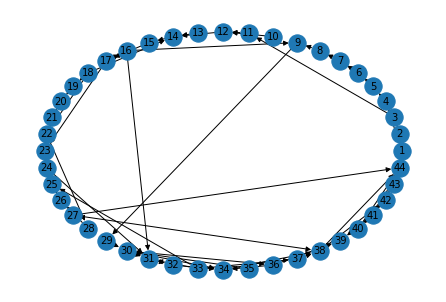

In [6]:
# Generamos el arreglo final de tipo "numpy array"
arreglo = d.to_numpy()
arreglo
G = nx.from_numpy_matrix(arreglo, create_using=nx.DiGraph())
G.edges(data=True)
pos = nx.circular_layout(G)
nx.draw_circular(G)
labels = {i : i + 1 for i in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=10)
plt.show()

In [7]:
G.edges(data=True)

OutEdgeDataView([(0, 1, {'weight': 2000.0}), (0, 3, {'weight': 2000.0}), (1, 2, {'weight': 535.0}), (1, 3, {'weight': 265.0}), (2, 10, {'weight': 647.0}), (3, 2, {'weight': 600.0}), (3, 4, {'weight': 1200.0}), (4, 5, {'weight': 1600.0}), (5, 6, {'weight': 1450.0}), (6, 7, {'weight': 2575.0}), (7, 8, {'weight': 2070.0}), (8, 28, {'weight': 2015.0}), (9, 11, {'weight': 950.0}), (10, 11, {'weight': 600.0}), (11, 13, {'weight': 940.0}), (12, 13, {'weight': 500.0}), (13, 14, {'weight': 565.0}), (14, 16, {'weight': 280.0}), (15, 8, {'weight': 623.0}), (15, 30, {'weight': 319.0}), (16, 15, {'weight': 579.0}), (16, 22, {'weight': 500.0}), (17, 13, {'weight': 450.0}), (17, 18, {'weight': 400.0}), (17, 21, {'weight': 2100.0}), (18, 19, {'weight': 140.0}), (19, 20, {'weight': 1400.0}), (21, 19, {'weight': 3150.0}), (21, 22, {'weight': 2800.0}), (21, 27, {'weight': 1800.0}), (22, 23, {'weight': 1407.0}), (23, 30, {'weight': 1704.0}), (25, 24, {'weight': 1050.0}), (25, 26, {'weight': 1700.0}), (26,

In [8]:
flow_value, flow_dict = nx.maximum_flow(G, 0, 43, capacity='weight')

In [9]:
flow_value

1480.0

In [10]:
flow_dict

{0: {1: 265.0, 3: 1215.0},
 1: {2: 0, 3: 265.0},
 2: {10: 280.0},
 3: {2: 280.0, 4: 1200.0},
 4: {5: 1200.0},
 5: {6: 1200.0},
 6: {7: 1200.0},
 7: {8: 1200.0},
 8: {28: 1200.0},
 9: {11: 0},
 10: {11: 280.0},
 11: {13: 280.0},
 12: {13: 0},
 13: {14: 280.0},
 14: {16: 280.0},
 15: {8: 0, 30: 280.0},
 16: {15: 280.0, 22: 0},
 17: {13: 0, 18: 0, 21: 0},
 18: {19: 0},
 19: {20: 0},
 20: {},
 21: {19: 0, 22: 0, 27: 0},
 22: {23: 0},
 23: {30: 0},
 24: {},
 25: {24: 0, 26: 0},
 26: {37: 0, 43: 0},
 27: {25: 0},
 28: {29: 1200.0},
 29: {30: 0, 33: 700.0, 35: 500.0},
 30: {31: 280.0},
 31: {33: 280.0},
 32: {24: 0, 30: 0, 36: 0},
 33: {37: 1480.0},
 34: {29: 0},
 35: {33: 500.0, 38: 0},
 36: {37: 0},
 37: {41: 980.0, 43: 500.0},
 38: {},
 39: {42: 0, 43: 680.0},
 40: {38: 0, 39: 0, 43: 0},
 41: {39: 680.0, 43: 300.0},
 42: {40: 0},
 43: {}}

Veamos el mismo ejercicio pero usando `Scipy`

In [11]:
# Scipy
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import maximum_flow


Para poder usar la función de flujo máximo de `scipy`, es necesario tener la matriz en formato _sparse_, una vez representada de esta manera, es sencillo encontrar el valor del fliujo máximo. Y este coincide con el obtenido por el software `networkx`.

In [12]:
# Generamos el arreglo final de tipo "numpy array"
arreglo = d.to_numpy()
arreglo
arreglo2=arreglo.astype(int)
graph = csr_matrix(arreglo2)
maximum_flow(graph, 0, 43).flow_value

1480

También podemos visualizar flujo máximo con esta librería

In [13]:
G_res=maximum_flow(graph, 0, 43).residual
print(G_res)

  (0, 1)	280
  (0, 3)	1200
  (1, 0)	-280
  (1, 2)	280
  (1, 3)	0
  (2, 1)	-280
  (2, 3)	0
  (2, 10)	280
  (3, 0)	-1200
  (3, 1)	0
  (3, 2)	0
  (3, 4)	1200
  (4, 3)	-1200
  (4, 5)	1200
  (5, 4)	-1200
  (5, 6)	1200
  (6, 5)	-1200
  (6, 7)	1200
  (7, 6)	-1200
  (7, 8)	1200
  (8, 7)	-1200
  (8, 15)	0
  (8, 28)	1200
  (9, 11)	0
  (10, 2)	-280
  :	:
  (37, 26)	0
  (37, 33)	-1480
  (37, 36)	0
  (37, 41)	980
  (37, 43)	500
  (38, 35)	0
  (38, 40)	0
  (39, 40)	0
  (39, 41)	-680
  (39, 42)	0
  (39, 43)	680
  (40, 38)	0
  (40, 39)	0
  (40, 42)	0
  (40, 43)	0
  (41, 37)	-980
  (41, 39)	680
  (41, 43)	300
  (42, 39)	0
  (42, 40)	0
  (43, 26)	0
  (43, 37)	-500
  (43, 39)	-680
  (43, 40)	0
  (43, 41)	-300


> **Nota para Uriel:**  Agregar en estas celdas lo que consideres para la sección de Pruebas y uso del algoritmo

---

## Documentación


El problema que se desarrolla es el Problema de Flujo Máximo el busca determinar el flujo máximo entre un nodo fuente y un nodo destino, los cuales están conectados a través de una red, con arcos que tienen capacidad finita.

La documentación de nuestro paquete fue desarrolada en `sphinx` para ser visualizada en `github-pages` la cual puede ser visualizada aquí [MaxflowAeiu](https://optimizacion-2-2022-gh-classroom.github.io/practica-2-segunda-parte-EddOselotl/index.html). Aquí se puede consultar la instalación del paquete implementado así como la descripción y argumentos de cada una de las funciones que lo componen. Hasta el momento se encuentra desarrollada la versión `0.1.4`.

# 3. Perfilamiento y Optimización

Una parte importante de la implementación de algoritmos, aparte de verificar su efectividad (es decir, que resuelvan el problema de forma adecuada) consiste en asegurarnos que funcionan de forma eficiente, consumiendo los recursos mínimos necesarios para su ejecución. Para ello, en esta parte del reporte se presenta el resultado obtenido después de hacer el perfilamiento del código para darnos cuenta de las áreas de oportunidad donde podríamos actuar para mejorar el rendimiento del código para un mejor uso de las unidades de procesamiento y/o reducción en el consumo de la memoria.

### ¿Qué es el perfilamiento?

El objetivo consiste en reimplementar nuestro método numérico realizado en la parte dos de la práctica 1 con niveles de BLAS, cómputo en paralelo (CPU/GPU), con compilación a C (por ejemplo vía cython, rcpp) o julia guiándose del perfilamiento de memoria, uso de procesador o tiempo de ejecución de su paquete. 

### Perfilamiento del paquete `MaxFlowAeiu`

Para el caso de nuestro paquete se realizaron dos tipos de perfilamiento:

#### Perfilamiento: medición de tiempo en Python y IPython

---

Lo más natural que podemos pensar en medir es el tiempo de ejecución de nuestros códigos. Python y IPython tienen herramientas para este propósito.

### Módulo: time

--- 

### Comando de magic: `%time`

--- 

Este comando nos regresa las mediciones siguientes:

**CPU times** que contiene:

* _user_ : mide la cantidad de tiempo de los statements que la CPU gastó para funciones que no están relacionadas con el kernel del sistema.

* _sys_ : mide la cantidad de tiempo de los statements que la CPU gastó en funciones a nivel de kernel del sistema.

* _total_ : suma entre el user y sys para todos todos los cores.

**Wall time:** mide el wall clock o elapsed time que se refiere al tiempo desde que inicia la ejecución de los statements hasta su finalización.

**Out:** resultado.

### Timeit

--- 

Se ejecuta desde la línea de comandos, con el comando de magic `%timeit` o realizando `import`.

--- 

### **cProfile**

---

cProfile está en la standard-library de Python como built-in. Se utiliza con la implementación CPython de Python para medir el tiempo de ejecución de cada función en el programa. Se ejecuta desde la línea de comandos, con un comando de magic o realizando import.

El output de cProfile muestra:

* El tiempo **total** de ejecución, el cual incluye el tiempo del bloque de código que estamos midiendo y el overhead al usar cProfile. Por esta razón se tiene un mayor tiempo de ejecución que con las mediciones de tiempo anteriores.

* La columna **ncalls** que como el nombre indica, muestra el número de veces que se llamó a cada función. En este caso las funciones lambda y math.exp son las que se llaman un mayor número de veces: $n=106$ veces.

* La columna **tottime** muestra el tiempo que tardaron estas funciones en ejecutarse (sin llamar a otras funciones).

* La columna **percall** es el cociente entre tottime y ncalls.

* La columna **cumtime** contiene el tiempo gastado en la función y en las demás que llama. 

* La columna de **percall** es un cociente entre la columna cumtime y el conteo del número de veces que se llamaron a funciones primitivas o también nombradas built in functions.

* La última columna indica información del _script_ de _python_ que se está ejecutando, la función y la línea en la que se encuentra dentro del código. 

En esta última observamos que la función que fue llamada más veces fue `append` al igual que `pop` con un total de 158 veces cada una, aunque de las que hicimos nosotros la más llamada es la de búsqueda de anchura con 6 llamadas y la que menos fue llamada fue `ford_fulkerson` la cual se encarga de obtener el flujo máximo de la red. Asimismo vemos el tiempo total que tardaron estas funciones en correr de forma independiente fueron 0.016 segundos para todas las funciones.

--- 

#### Perfilamiento: medición de uso de memoria en Python

Si bien las computadoras de hoy en día tienen una gran cantidad de RAM es importante que las aplicaciones no utilicen la totalidad pues en ese caso se tendrá una penalización en el performance de la aplicación al utilizar _virtual memory_.

**memory_profiler**

---

Se ejecuta desde la línea de comandos, con un comando de magic o realizando _import_. Al instalar `memory_profiler` se incluyen dos comandos de magic: **%memit** y **%mprun**. Este último (**%mprun**) es similar a `line_profiler` al analizar línea por línea el uso de memoria.

En el caso de import regresa una lista de valores de uso de memoria en MiB medidas cada cierto interval (argumento de **memory_usage**). En lo siguiente se pide que se regrese el máximo uso de memoria de la lista.

Después de haber realizado estas evaluaciones y análisis del código, el siguiente paso es mejorar el tiempo de nuestro codigo, considerando que hicimos varios tipos de perfilamiento para ser evaluados. En este proceso observamos que sí hubo una mejora en el tiempo de ejecusion, pero que en contraste, se afecto de manera negativa en el conusmo de memoria, aunque consideramos que esto es mínimo.

Para más detalle se puede consultar el notebook de [perfilamiento.ipynb](https://github.com/sancas96/Final_opt2/blob/main/Avances/avance_2/perfilamiento.ipynb) con el datelle de estas pruebas. 

### Reimplementación del paquete `MaxFlowAeiu` para su optimización



# 4. Hardware utilizado y Reproducibilidad

Una parte importante que se aprendió durante la realización de este proyecto es que la implementación del algoritmo que se realizó debe estar disponible para que otros puedan utilizarla, casi, sin importar que tipo de equipo de computo o sistema operativo posean, siempre y cuando cumplan o tengan acceso a ciertas herramientas que facilitan y permiten reproducir nuestros resultados.

## Contenedores de Docker

Para la implementación de este proyecto se utilizaron contenedores de Docker, uno base que es [FROM palmoreck/kale_certs:0.6.1](https://github.com/palmoreck/dockerfiles/blob/master/jupyterlab/kale/general/certs/0.6.1/Dockerfile) que nos fue util para utilizar herramientas tanto kale como kubernetes, así como una imagen de docker que contuviera nuestro paquete [FROM sancas96/docker_t2](https://hub.docker.com/r/sancas96/docker_t2).

Una vez desarrollado el paquete de manera básica utilizamos las herramientas de kale y minikube para correr varios experimentos y así detectar valores con los cuales falla nuestro paquete o posibles mejoras a realizar.

## Binder



## AWS




> **Nota para todes:**  Agregar en estas celdas lo que consideres para la sección de Hardware y Reproducibilidad

---

# 5. Conclusiones 

Edgar

La importancia de este trabajo, además de lograr mejorías de optimización del código del algoritmo original usando el lenguaje C, consistió en la aplicación del algoritmo de Ford-Fulkerson a un problema real, pues como se mencionó en el capítulo del uso del algoritmo, es un programa que ha sido evaluado técnica y económicamente por los Programas de Expansión de Generación y Transmisión (PEGyT). Al respecto, nos gustaría pensar que este tipo de métodos podrían ser parte del abanico de alternativas (proyectos de infraestructura) que se proponen normalmente, como son: minimizar pérdidas de transmisión, reducción de emisiones de gases de efecto invernadero, maximización de ganancias en centrales eléctricas, entre otras. Así como respetando ciertas restricciones: cumplimiento de metas de generación renovable, política de confiabilidad (energía no suministrada y margen de reserva), operación dentro de los límites o capacidades de los enlaces, entre otras.

Uriel

Ita

Poder hacer uso de herramientas como Kale y Kubeflow para poder entender y eficientar nuestro código nos hace poder hacer experimentos de manera más fácil y controlada lo cual nos ayuda a tener más tiempo para pensar en posible usos y mejoras del problema de flujo máximo.

> **Nota para todes:**  Agregar en estas celdas lo que consideres una conclusión del trabajo realizado :)


---

# Referencias
* [1] [Palacios E. (2022) Libro de Optimización](https://itam-ds.github.io/analisis-numerico-computo-cientifico/4.optimizacion_en_redes_y_prog_lineal/4.2/Definiciones_generales_de_flujo_en_redes.html)
* [2] [Dumora c. el all. Data Oriented Algorithm for Real Time Estimation of Flow Rates and Flow Directions in Water Distribution Network](https://arxiv.org/pdf/1807.10147.pdf)
* [3] [Max Flow Problem Introduction](https://www.geeksforgeeks.org/max-flow-problem-introduction/)
* [4] [Ford-Fulkerson Algorithm](https://www.programiz.com/dsa/ford-fulkerson-algorithm)
* [5] [Algoritmo de Ford-Fulkerson - Ford–Fulkerson algorithm](https://upwikies.top/wiki/Ford%e2%80%93Fulkerson_algorithm)
* [6] [Oviedo J. (2008) Algoritmo de Ford-Fulkerson Mejorado](http://www.ptolomeo.unam.mx:8080/jspui/bitstream/132.248.52.100/2387/1/gonzalezoviedo.pdf)
* [7] [Building a Smarter (and Cheaper) School Bus System: How a Boston-MIT Partnership Led to New Routes That Are 20% More Efficient and Saved the District $5 Million](https://www.the74million.org/article/building-a-smarter-and-cheaper-school-bus-system-how-a-boston-mit-partnership-led-to-new-routes-that-are-20-more-efficient-use-400-fewer-buses-save-5-million/)
* [8] [Optimazation examples](https://vitalflux.com/convex-optimization-explained-concepts-examples/)
* [9] [Breadth First Search or BFS for a Graph](https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/)